### CH22M518 - Husain Dehnuwala
### Assignment 1

In [1]:
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE, SelectKBest, f_regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import scipy.stats as st

import random
import math as m


sns.set(style='whitegrid', palette='hls')
%matplotlib inline

#### **Q1 - Linear Regression**

##### **1. The given Housing price dataset is divided into Training, Validation and Test dataset using a 70: 20: 10 ratio. (For the description of the dataset please refer this link)**

##### **2. The first 13 columns indicate features and the last column 'Price' indicates Target.**

In [2]:
house = pd.read_csv ( 'train.csv' )
house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
1,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1
3,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,22.5
4,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
350,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4
351,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,19.2
352,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6


##### **3. Use the sci-kit learn library for fitting the linear regression model. Use validation data for hyperparameter tuning. Use R-squared value (coefficient of determination) and mean Square error as evaluation metrics.**

In [3]:
lr = LinearRegression()

In [4]:
lr.fit ( house.loc [ :,'CRIM': 'LSTAT' ], house.loc [ :, 'Price' ])
print ( lr.intercept_ )
print ( lr.coef_ )
lr_df = pd.DataFrame ( lr.coef_, index = house.columns [ 0: -1 ],
                      columns = [ 'Coeffs' ])
lr_df

37.937107741833955
[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


,Coeffs
CRIM,-0.121310
ZN,0.044466
INDUS,0.011342
CHAS,2.511246
NOX,-16.231253
RM,3.859068
AGE,-0.009985
DIS,-1.500270
RAD,0.242143
TAX,-0.011072


**Using Validation set for hyperparameter tuning**

In [5]:
validation_data = pd.read_csv ( 'validation.csv' )
validation_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
1,0.06911,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,5.0,398.0,15.2,389.71,4.69,30.5
2,0.17446,0.0,10.59,1.0,0.489,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7
3,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,25.0
4,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
97,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
98,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
99,0.59005,0.0,21.89,0.0,0.624,6.372,97.9,2.3274,4.0,437.0,21.2,385.76,11.12,23.0


In [6]:
# Combining train and validation data set for cross-validation
train_valid_data = pd.concat ([ house, validation_data ])
train_valid_data.reset_index ( inplace = True)
train_valid_data.drop ( columns = [ 'index' ], inplace = True)

# Standard Scaling the numerical features
scale = StandardScaler()
train_valid_scaled = scale.fit_transform ( train_valid_data )
train_valid_data2 = pd.DataFrame ( data = train_valid_scaled,
                                  index = np.arange ( 0, len ( train_valid_data [ 'Price' ])),
                                  columns = train_valid_data.columns )

In [7]:
# Standard Scaling the numerical features for the train and the validation datasets for future use
train_scaled = scale.fit_transform ( house )
house2 = pd.DataFrame ( data = train_scaled, 
                       index = np.arange ( 0, len ( house [ 'Price' ])),
                       columns = house.columns )

validation_scaled = scale.fit_transform(validation_data)
validation2 = pd.DataFrame ( data=validation_scaled, 
                            index =np.arange ( 0, len ( validation_data [ 'Price' ])),
                            columns = validation_data.columns)

In [8]:
# We need to decide the no. of folds using KFold module
# Trying GridSearchCV with GradientBoostingRegressor

kf3 = KFold ( n_splits = 5, shuffle = True, random_state = 123)

gdb = GradientBoostingRegressor()

search_space ={
    "random_state": [ 100 ],
    'loss': [ 'squared_error', 'absolute_error' ],
    'learning_rate': [ 0.05, 0.1, 0.5, 1 ]       
}

GS = GridSearchCV(estimator = gdb,
                 param_grid = search_space,
                 scoring = [ "r2", "neg_root_mean_squared_error" ],
                 refit = 'r2',
                 cv = kf3,
                 verbose = 1 )

GS.fit ( train_valid_data2.loc [ :, 'CRIM': 'LSTAT' ], train_valid_data.loc [ :, 'Price' ])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error'],
                         'random_state': [100]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=1)

In [9]:
print('1. Best Estimator and Parameter pair: ',GS.best_estimator_, ' \
\n2. Best Parameters: ', GS.best_params_, '\
\n3. Best R2 score: ', GS.best_score_)

1. Best Estimator and Parameter pair:  GradientBoostingRegressor(random_state=100)  
2. Best Parameters:  {'learning_rate': 0.1, 'loss': 'squared_error', 'random_state': 100} 
3. Best R2 score:  0.8892296529791736


##### **4. Using the trained model, predict the housing price for the given data in the submission.csv file**

In [10]:
test_data = pd.read_csv ( 'submission.csv' )
test_scaled = scale.fit_transform ( test_data )
test2 = pd.DataFrame ( data = test_scaled, 
                      index = np.arange ( 0, len ( test_data [ 'Price' ])),
                      columns = test_data.columns)

y_pred_lr = GS.predict ( test2.loc [ :, 'CRIM': 'LSTAT' ])

y_pred_lr_df = pd.DataFrame ( data = y_pred_lr, 
                             columns = [ 'Submisison Set Price_Predicted' ])
y_pred_lr_df

,Submisison Set Price_Predicted
0,12.921098
1,24.949797
2,34.516354
3,21.241013
4,28.409831
5,41.689064
6,44.564857
7,21.626649
8,18.697514
9,18.629978


##### **5. Obtain the following values.**
##### **a. Mean Squared error and R-squared value for training data and validation data respectively.**
##### **b. Plot the scatter plot for ytrue against ypredicted for training data and validation respectively**

In [11]:
# Model Building:
y_pred_train = GS.predict ( house2.loc [ :, 'CRIM': 'LSTAT' ])
y_pred_valid = GS.predict ( validation2.loc [ :, 'CRIM': 'LSTAT' ])

print ("Training Data metrics - ")
print ( 'R2 Score', metrics.r2_score ( house.loc [ :, 'Price' ], y_pred_train ))
print ( 'MSE', metrics.mean_squared_error ( house.loc [ :, 'Price' ],
                                                 y_pred_train))

print ("\nValidation Data metrics - ")
print ( 'R2 score', metrics.r2_score ( validation_data.loc [ :,'Price' ],
                                           y_pred_valid ))
print( 'MSE', metrics.mean_squared_error ( validation_data.loc [ :, 'Price' ],
                                          y_pred_valid))

Training Data metrics - 
R2 Score 0.9680105817527793
MSE 2.7115674739123397

Validation Data metrics - 
R2 score 0.9050727465642161
MSE 8.187934099746741


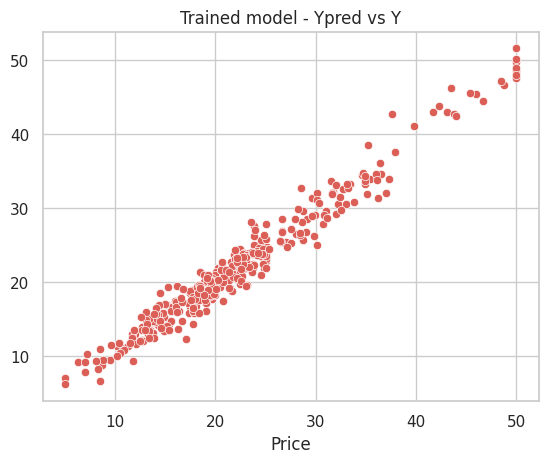

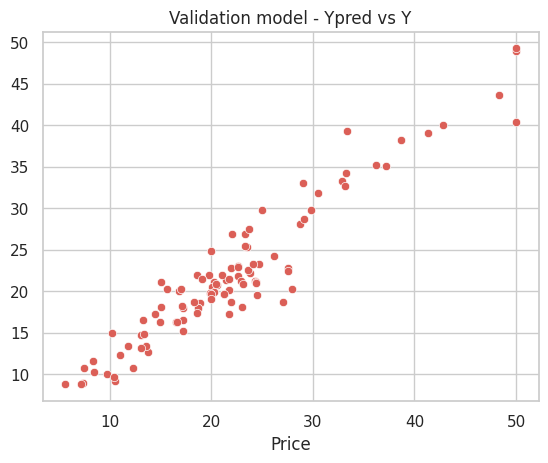

In [12]:
plt.title('Trained model - Ypred vs Y')
sns.scatterplot ( x = house.loc [ :, 'Price' ], y = y_pred_train )
plt.show()

plt.title ( 'Validation model - Ypred vs Y' )
sns.scatterplot ( x = validation_data.loc [ :, 'Price' ], y = y_pred_valid)
plt.show()

##### **6. For this part, you will have to write Python code from scratch without using any in-built python functions or external libraries, for gradient descent and use the same to train the linear model and provide the output for Questions 4 and 5 using the model you build from scratch.**

In [13]:
n = len ( train_valid_data2 [ 'Price' ])
X = np.array ( train_valid_data2.loc [ :, 'CRIM': 'LSTAT' ])
X = sm.add_constant ( X )
Y = np.array ( train_valid_data2.loc [ :, 'Price' ])
Y = Y.reshape ( 455, 1 )

In [14]:
lr = 0.1
epochs = 2000

# Initial guess for w
w = np.zeros ( 14 )
w = w.reshape ( 14, 1 )

# Gradient Descent alogrithm
for i in range ( epochs ):
    Yest = (( w.T.dot ( X.T )).T )
    cost = ( 1 / n ) * sum (( Y - Yest ) ** 2 )
    grad_Jw = ( -2 / n ) * ( X.T.dot ( Y - Yest ))
    
    w = w - lr * grad_Jw
    
    Yest = (( w.T.dot ( X.T )).T )   
    cost_new = ( 1 / n ) * sum (( Y - Yest ) ** 2 )
    
    if (( cost - cost_new ) / cost ) >= 0.0001 :
          cost = cost_new
    else:
        break   
        

**Generating predict values**

In [15]:
normalise_test = ( test_data - test_data.mean()) / ( test_data.std ())
X_test = np.array ( normalise_test.loc [ :, 'CRIM': 'LSTAT' ])
X_test = sm.add_constant ( X_test )
ypred_test_gd = (( w.T.dot ( X_test.T )).T )
ypred_test_gd = ypred_test_gd * ( train_valid_data.loc [ :, 'Price' ].std()) + train_valid_data.loc [ :,'Price' ].mean ()

ypred_test_gd_df = pd.DataFrame(data = ypred_test_gd, columns = [ 'Submisison Set Price_predicted' ])

In [16]:
normalised_house = ( house - house.mean ()) / ( house.std ())
X_train = np.array ( normalised_house.loc [ :, 'CRIM' : 'LSTAT' ])
X_train = sm.add_constant ( X_train )
ypred_train_gd = (( w.T.dot ( X_train.T )).T )
ypred_train_gd = ypred_train_gd * ( house.loc [ :, 'Price' ].std ()) + house.loc [ :, 'Price' ].mean()
ypred_train_gd = ypred_train_gd.reshape ( 354, 1 )

#Predication on validation dataset
normalised_validation = ( validation_data - validation_data.mean ()) / ( validation_data.std ())
X_valid = np.array ( normalised_validation.loc [ : , 'CRIM' : 'LSTAT' ])
X_valid = sm.add_constant ( X_valid )
ypred_valid_gd = (( w.T.dot ( X_valid.T )).T )
ypred_valid_gd = ypred_valid_gd * ( validation_data.loc [ :, 'Price' ].std()) + validation_data.loc [ :, 'Price' ].mean()
ypred_valid_gd = ypred_valid_gd.reshape ( 101, 1 )

In [17]:
# Training data score
print( 'R2: ', metrics.r2_score ( house.loc [ :, 'Price' ], ypred_train_gd ))
print( 'MSE: ', metrics.mean_squared_error ( house.loc [ :, 'Price' ], ypred_train_gd ))

# Validation data score
print( 'R2: ', metrics.r2_score ( validation_data.loc [ :, 'Price' ], ypred_valid_gd ))
print( 'MSE: ', metrics.mean_squared_error ( validation_data.loc [ :, 'Price' ], ypred_valid_gd ))

R2:  0.7621558757920507
MSE:  20.160741470172695
R2:  0.7016222706550439
MSE:  25.736520296157817


#### **Q2 - Logistic Regression**

In [18]:
logdf = pd.read_csv ( 'lgtrain.csv')
logdf_test = pd.read_csv ( 'lgtest.csv')
x = logdf.loc [ :, 'bmi': 'race' ]
y = logdf.loc [ :, 'complication' ]

##### **1. Split the given train dataset into train and validation in a ratio of 80:20**

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split ( x, y, test_size = 0.2,
                                                       random_state = 100)

In [20]:
lg = LogisticRegression ( solver = 'liblinear' )
lg.fit ( x_train, y_train )
print ( 'Coefficients: ', lg.coef_ )
print ( 'Intercepts: ', lg.intercept_ )

Coefficients:  [[-1.37535519e-02  2.18790068e-02  1.18870312e-01  1.61202404e-01
   2.11739887e-02  1.86225776e-01  3.65368715e-01  4.12893813e-02
   1.38918846e-01 -4.78367702e-01  1.75454000e-02  8.99736068e-02
   4.37811916e-03  5.76173691e+00  1.21335685e-01  3.16044473e-01
   9.96330087e-02 -9.71701562e-02  3.07667071e-03 -3.46948835e-02
   1.85020766e-01 -8.02436287e-01  2.36340761e-01 -7.65574436e-02]]
Intercepts:  [-2.94187242]


In [21]:
ypred_train_lg = lg.predict ( x_train )
ypred_valid_lg = lg.predict ( x_valid )

##### **2. Plot the confusion matrix**


Training model classification report

               precision    recall  f1-score   support

           0       0.81      0.94      0.87      7915
           1       0.66      0.34      0.45      2620

    accuracy                           0.79     10535
   macro avg       0.74      0.64      0.66     10535
weighted avg       0.78      0.79      0.77     10535



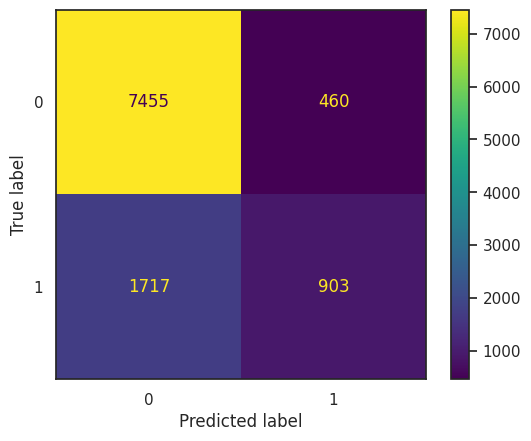

In [22]:
confusion_matrix = metrics.confusion_matrix ( y_train,  ypred_train_lg )
display = metrics.ConfusionMatrixDisplay ( confusion_matrix )
sns.set ( style = 'white' )
display.plot ()

# Classification report
print ()
print ( 'Training model classification report\n\n',
       metrics.classification_report(y_train, ypred_train_lg ))

##### **3. Compute the Accuracy and F1 score of the validation dataset**

In [23]:
# Classification report
print (' \nValidation model classification report\n\n', 
       metrics.classification_report ( y_valid, ypred_valid_lg ))

 
Validation model classification report

               precision    recall  f1-score   support

           0       0.80      0.95      0.87      1934
           1       0.69      0.34      0.45       700

    accuracy                           0.78      2634
   macro avg       0.74      0.64      0.66      2634
weighted avg       0.77      0.78      0.76      2634



##### **4. Predict the complication column of the test dataset and display**

In [24]:
ypred_lg_test = lg.predict( logdf_test.loc [ :, 'bmi': 'race' ])

ypred_lg_test_df = pd.DataFrame ( data = ypred_lg_test, 
                            columns = [ 'Complication LogReg-Lib_predicted' ])

print ( 'Logistic Regression output using ML libraries \n', ypred_lg_test_df )

Logistic Regression output using ML libraries 
       Complication LogReg-Lib_predicted
0                                     1
1                                     0
2                                     0
3                                     1
4                                     0
...                                 ...
1461                                  0
1462                                  0
1463                                  0
1464                                  1
1465                                  0

[1466 rows x 1 columns]


##### **5. Apply gradient descent steps as done in Linear Regression (Q1)**

In [25]:
normalised_Xtrain = ( x_train - x_train.mean ()) / x_train.std ()
normalised_Ytrain = ( y_train - y_train.mean ()) / y_train.std ()

n2 = len ( normalised_Xtrain [ 'bmi' ])

# Initial weights
w = np.zeros ( 25 )
w = w.reshape ( 25, 1 )

# X and Y as numpy array
X = np.array ( normalised_Xtrain.loc [ :, 'bmi' : 'race' ])
X2 = sm.add_constant ( X )
Y = np.array ( normalised_Ytrain )
Y2 = Y.reshape ( 10535, 1 )

#learning rate and epochs
lr_lg = 0.1
epochs_lg = 1000

wt = np.zeros(25)
wt = wt.reshape(25,1)

for j  in range ( epochs_lg ):
  z2 = (( wt.T.dot ( X2.T )).T )
  sigmoid = 1 / ( 1 + np.exp ( -z2 ))

  cost2 = ( -1 / n2 ) * ( Y2.T.dot ( np.log ( sigmoid )) + ( 1 - Y2 ).T.dot ( np.log ( 1 - sigmoid )))
  grad_Jw2 = ( 2 / n2 ) * ( X2.T.dot ( sigmoid - Y2 ))

  wt = wt - lr_lg * grad_Jw2

  z2 = (( wt.T.dot ( X2.T )).T ) 
  sigmoid = 1 / ( 1 + np.exp ( -z2 ))

  cost_new2 = ( -1 / n2 ) * (( Y2.T ).dot ( np.log ( sigmoid )) + (( 1 - Y2 ).T ).dot ( np.log ( 1 - sigmoid )))
  
  if (( cost2 - cost_new2 ) / cost2 ) >= 0.001 :
    cost2 = cost_new2              
  else:
    break

In [26]:
# Gradient Descent Logistic Regression prediction
X_test = logdf_test.loc [ :, 'bmi': 'race' ]
X_test_np = sm.add_constant ( np.array ( X_test ) )

z_pred = (( wt.T.dot ( X_test_np.T )).T ) 
sigmoid_pred = 1 / ( 1 + np.exp ( -z_pred ))
lg_pred_gd = ( np.round ( sigmoid_pred )).astype ( int )

lg_pred_gd_df = pd.DataFrame ( data = lg_pred_gd, columns = ['Complications GD_predicted' ])

print ( 'Complication prediction using GD for LogReg estimation: \n', lg_pred_gd_df)

Complication prediction using GD for LogReg estimation: 
       Complications GD_predicted
0                              0
1                              0
2                              0
3                              1
4                              0
...                          ...
1461                           1
1462                           0
1463                           0
1464                           1
1465                           0

[1466 rows x 1 columns]


#### Q3. Multi-class classification

In [27]:
q3_df = pd.read_csv ( 'Q3dataset.csv' )
q3_df.head()

,Unnamed: 0,id,age,sex,study_location,chest_pain_type,resting_bloodpressure,cholestrol,fasting_bloodsugar,resting_ecg,maximum_heartrate_achieved,exercise_induced angina,st_depression,slope,major_vessel_colored,thal,target
0,0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**We will delete the unnamed column**

In [28]:
q3_df.drop ( columns = 'Unnamed: 0', inplace = True )
q3_df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          920 non-null    int64  
 1   age                         920 non-null    int64  
 2   sex                         920 non-null    object 
 3   study_location              920 non-null    object 
 4   chest_pain_type             920 non-null    object 
 5   resting_bloodpressure       861 non-null    float64
 6   cholestrol                  890 non-null    float64
 7   fasting_bloodsugar          830 non-null    object 
 8   resting_ecg                 918 non-null    object 
 9   maximum_heartrate_achieved  865 non-null    float64
 10  exercise_induced angina     865 non-null    object 
 11  st_depression               858 non-null    float64
 12  slope                       611 non-null    object 
 13  major_vessel_colored        309 non

##### **Data Pre-processing**

**1. You will find that there are many categorical attributes in the given dataset. For the binary attributes i.e., sex, fasting_bloodsugar, and exercise_induced angina you can convert it as 0 or 1 .**

In [29]:
q3_df [ 'sex' ] = q3_df [ 'sex' ].map ({ 'Male': 1, 'Female': 0 })
q3_df [ 'fasting_bloodsugar' ] = q3_df [ 'fasting_bloodsugar' ].map ({ True: 1, False: 0})
q3_df [ 'exercise_induced angina' ] = q3_df [ 'exercise_induced angina' ].map ({ True: 1, False: 0})

**2. For the multi-label attributes, use can use one hot encoding which can be done using pd.get_dummies i.e., a method in the pandas package.**

In [30]:
q3_df_new = pd.get_dummies ( q3_df, columns = [ 'study_location', 
                          'chest_pain_type', 'resting_ecg', 'slope', 'thal' ])

**3. You might also find that the dataset consists of so many null values i.e., so many values are missing. If we drop all the data with null values we will lose more that 70 % of our data. In order to avoid that you can use any imputation techniques in sklearn package i.e., mean, median, or k-means imputation You are encouraged to experiment  with all the imputations mentioned above.**

In [31]:
# Using mode for cateogrical data.

df_impute = q3_df_new.copy ( deep = True )
df_impute [ 'fasting_bloodsugar' ].fillna ( df_impute [ 'fasting_bloodsugar' ].mode ()[ 0 ], inplace = True )
df_impute [ 'exercise_induced angina' ].fillna ( df_impute [ 'exercise_induced angina' ].mode ()[ 0 ], inplace = True )

**Using mean as an imputation technique**

In [32]:
mean_impute = SimpleImputer ( missing_values = np.nan, strategy = 'mean' )
mean_impute_fit = mean_impute.fit ( df_impute.loc [:, 
          [ 'resting_bloodpressure', 'cholestrol', 'maximum_heartrate_achieved',
           'st_depression', 'major_vessel_colored' ]])
mean_impute_data = mean_impute_fit.transform ( df_impute.loc [:, 
          ['resting_bloodpressure', 'cholestrol', 'maximum_heartrate_achieved',
           'st_depression', 'major_vessel_colored' ]])
mean_imputed_df = df_impute.copy ( deep = True )
mean_imputed_df.loc [ :, ['resting_bloodpressure',
                          'cholestrol', 'maximum_heartrate_achieved', 
              'st_depression', 'major_vessel_colored']] = mean_impute_data [ :, : ]

**Using Median as an imputation technique**

In [33]:
median_impute = SimpleImputer ( missing_values = np.nan, strategy = 'median' )
median_impute_fit = median_impute.fit ( df_impute.loc [:, [ 'resting_bloodpressure',
      'cholestrol', 'maximum_heartrate_achieved', 'st_depression',
       'major_vessel_colored' ]])
median_impute_data = median_impute_fit.transform ( df_impute.loc [:, [ 
    'resting_bloodpressure', 'cholestrol', 'maximum_heartrate_achieved',
     'st_depression', 'major_vessel_colored' ]])
median_imputed_df = df_impute.copy ( deep = True )
median_imputed_df.loc [ :, [ 'resting_bloodpressure', 'cholestrol',
 'maximum_heartrate_achieved', 'st_depression', 'major_vessel_colored']] = median_impute_data [ :, : ]

**Using k-means imputation technique**

In [34]:
kmeans_impute = KNNImputer ( n_neighbors = round ( 0.7 * len ( q3_df [ 'id' ])),
                            weights = 'uniform', metric = 'nan_euclidean' )
kmeans_impute_fit = kmeans_impute.fit ( df_impute.loc [:, [ 'resting_bloodpressure',
        'cholestrol', 'maximum_heartrate_achieved', 'st_depression', 'major_vessel_colored' ]])
kmeans_impute_data = kmeans_impute_fit.transform ( df_impute.loc [ :, [
     'resting_bloodpressure', 'cholestrol', 'maximum_heartrate_achieved',
      'st_depression', 'major_vessel_colored' ]])
kmeans_imputed_df = df_impute.copy ( deep = True )
kmeans_imputed_df.loc [ :, [ 'resting_bloodpressure', 'cholestrol',
'maximum_heartrate_achieved', 'st_depression', 'major_vessel_colored' ]] = kmeans_impute_data [ :, : ]

**4. The study location attribute is not necessary to predict the severity of the disease so you can drop that column using df.drop i.e., a method in pandas dataframe**

In [35]:
mean_imputed_df.drop ( columns = [ 'study_location_Cleveland', 'study_location_Hungary', 
    'study_location_Switzerland', 'study_location_VA Long Beach'], inplace = True )
median_imputed_df.drop ( columns = [ 'study_location_Cleveland', 'study_location_Hungary',
    'study_location_Switzerland', 'study_location_VA Long Beach'], inplace = True )
kmeans_imputed_df.drop ( columns = [ 'study_location_Cleveland', 'study_location_Hungary',
    'study_location_Switzerland', 'study_location_VA Long Beach'], inplace = True )

##### **Data splitting and model training**

1. Once these pre-processing steps are complete you can keep the y (which we need to predict) as the target column and all others as the X (i.e., features)
2. You can use sklearn.model_selection’s method i.e., train_test_split to split the data into
training and test set. You should keep the train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=12) while splitting the dataset for grading it correctly.
3. You can use MinMaxScaler()from sklearn.preprocessing to normalize our training and test data.
4. Use sklearn.linear_model’s LogisticRegression for training the data and find the accuracy and plot the confusion matrix for the test data


In [36]:
def train_fit_test ( imputed_df, dataset_type ):

  # Separating features and labels
  features = pd.concat([ imputed_df.iloc [ :, 1 : 10 ],
                       imputed_df.iloc [ :, 11 : 28]],
                       join='outer', axis = 1)
  labels = pd.DataFrame ( data = imputed_df['target'], 
                          index = np.arange ( 0, len ( imputed_df [ 'target' ])),
                          columns = [ 'target' ])
  
  # Splitting data into train and test
  X_train, X_test, y_train, y_test = train_test_split ( features, labels, 
                                                       stratify = labels, 
                                                       test_size = 0.2,
                                                       shuffle = True,
                                                       random_state = 12 )
  # Normalise data using MinMaxScaler
  scaler = MinMaxScaler()
  X_train_scaled = scaler.fit_transform ( X_train )
  X_test_scaled = scaler.fit_transform ( X_test )

  # Logistic regression model training
  lg_model = LogisticRegression ( solver = 'liblinear', C = 0.01 )
  lg_model.fit ( X_train_scaled, np.ravel ( y_train ))
  ypred = lg_model.predict ( X_test_scaled )

  accuracy_score = metrics.accuracy_score ( y_test, ypred )
  print ( f'Accuracy Score for the { dataset_type } dataset: ', accuracy_score )

  # Classification report
  print ( f'\n{ dataset_type } model classification report', 
         metrics.classification_report ( y_test, ypred ))

  confusion_matrix = metrics.confusion_matrix ( y_test, ypred )
  
  print ( 'Confusion Matrix for the mean imputed dataset \n', confusion_matrix )
  
  display = metrics.ConfusionMatrixDisplay ( confusion_matrix )
  sns.set ( style = 'dark' )
  display.plot ()

Accuracy Score for the Mean Imputed dataset:  0.5706521739130435

Mean Imputed model classification report               precision    recall  f1-score   support

           0       0.66      0.89      0.76        82
           1       0.44      0.60      0.51        53
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.22      0.30      0.25       184
weighted avg       0.42      0.57      0.48       184

Confusion Matrix for the mean imputed dataset 
 [[73  9  0  0  0]
 [21 32  0  0  0]
 [ 8 14  0  0  0]
 [ 7 14  0  0  0]
 [ 2  4  0  0  0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


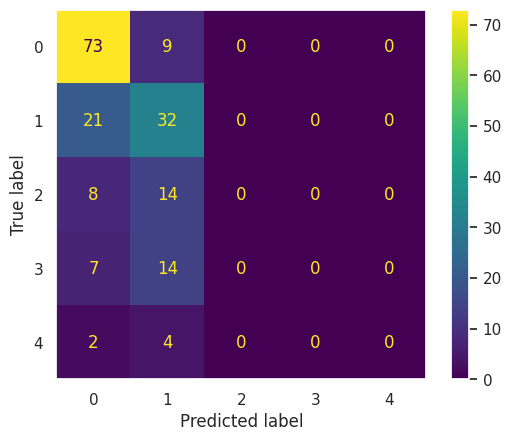

In [37]:
train_fit_test ( mean_imputed_df, 'Mean Imputed' )

Accuracy Score for the Median Imputed dataset:  0.5706521739130435

Median Imputed model classification report               precision    recall  f1-score   support

           0       0.66      0.89      0.76        82
           1       0.44      0.60      0.51        53
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.22      0.30      0.25       184
weighted avg       0.42      0.57      0.48       184

Confusion Matrix for the mean imputed dataset 
 [[73  9  0  0  0]
 [21 32  0  0  0]
 [ 8 14  0  0  0]
 [ 7 14  0  0  0]
 [ 2  4  0  0  0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


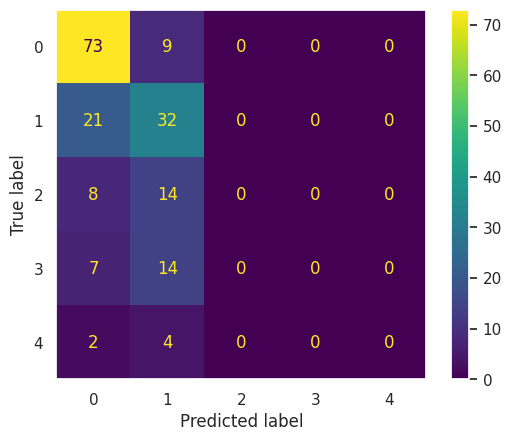

In [38]:
train_fit_test ( median_imputed_df, 'Median Imputed' )

Accuracy Score for the K-means Imputed dataset:  0.5706521739130435

K-means Imputed model classification report               precision    recall  f1-score   support

           0       0.66      0.89      0.76        82
           1       0.44      0.60      0.51        53
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.22      0.30      0.25       184
weighted avg       0.42      0.57      0.48       184

Confusion Matrix for the mean imputed dataset 
 [[73  9  0  0  0]
 [21 32  0  0  0]
 [ 8 14  0  0  0]
 [ 7 14  0  0  0]
 [ 2  4  0  0  0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


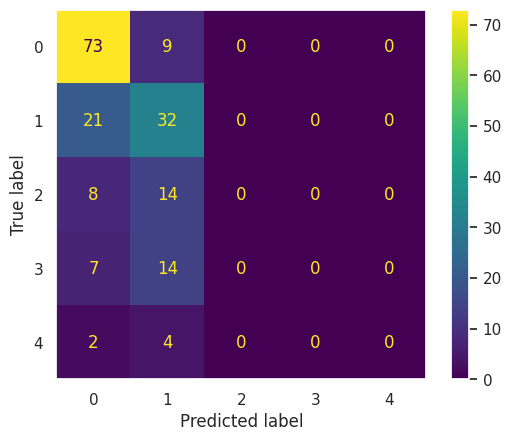

In [39]:
train_fit_test ( kmeans_imputed_df, 'K-means Imputed' )